# Finding the best fuel type for cobify

In [23]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [15]:
df_csv = pd.read_csv('data/measurements.csv')
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [42]:
df_exl = pd.read_excel('data/measurements2.xlsx')
df_exl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [16]:
df_exl

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [36]:
df_exl[df_exl['gas_type']=='E10'].describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,160.000000,160.000000,160.000000,157.000000,160.000000,160.000000,160.000000,160.000000,5.000000
mean,21.096250,4.931250,43.506250,21.917197,10.118750,0.043750,0.100000,0.075000,39.600000
std,20.307234,0.900956,14.077949,0.659854,6.392185,0.205181,0.300942,0.264218,3.056959
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000,37.700000
25%,12.075000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000,0.000000,38.000000
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000,0.000000,38.300000
75%,21.200000,5.300000,51.000000,22.500000,14.250000,0.000000,0.000000,0.000000,39.000000
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000,45.000000


In [37]:
df_exl[df_exl['gas_type']=='SP98'].describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,228.000000,228.000000,228.000000,219.000000,228.000000,228.000000,228.000000,228.000000,8.000000
mean,18.639912,4.899123,40.820175,21.938356,12.228070,0.100877,0.140351,0.087719,35.562500
std,24.179598,1.118408,13.170122,1.201906,7.271373,0.301829,0.348115,0.283509,10.672787
min,1.300000,3.300000,16.000000,19.000000,-3.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.200000,32.000000,21.500000,7.000000,0.000000,0.000000,0.000000,37.150000
50%,14.150000,4.700000,39.500000,22.000000,11.000000,0.000000,0.000000,0.000000,37.650000
75%,18.150000,5.225000,48.000000,22.000000,17.000000,0.000000,0.000000,0.000000,39.500000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


There are 228 cars with a SP98 engine and 160 cars with a E10 engine. Distance and Consumtion and speed are lower for SP98 cars, however we have to check in detail if this is a statistically relevant difference.  

The meaing of the variables temp_inside, temp_outside, rain, sun are not conclusive and have to be discussed with the customer. 

The culomn refill liters and refill gas have not enough data points for both engine types and therefore will be droped.

In [43]:
df_exl.drop(['refill liters', 'refill gas'], axis=1, inplace=True)

In [44]:
df_exl

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0


## Fuel consumption

As a first feature we will compare the fuel consumptions of the two types of engines:

In [18]:
df_exl[df_exl['consume']==df_exl['consume'].max()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
61,2.1,12.2,23,21.5,9,NaN,SP98,1,1,0,NaN,NaN


The engine with index 61 has the maximum consumtion of 12.2. It is a SP98 type.

In [20]:
df_exl.groupby('gas_type')['consume'].mean()

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64

<AxesSubplot:xlabel='gas_type', ylabel='consume'>

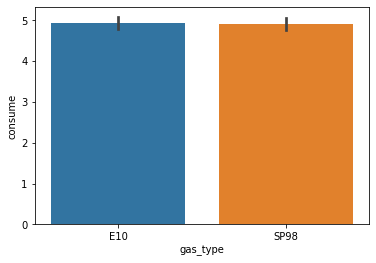

In [22]:
sns.barplot(data= df_exl, x='gas_type', y='consume')

## T-test
Engines with both fueltypes consume a very similar amount of gas, however E10 is slightly higher. Do be sure that both are not actually the same we have to do a t-test:
Nullhypothesis: Both fueltypes actually have the same consumtion.

In [25]:
stats.ttest_ind(df_exl['consume'][df_exl['gas_type'] == 'E10'],
                df_exl['consume'][df_exl['gas_type'] == 'SP98'])

Ttest_indResult(statistic=0.3011626300254617, pvalue=0.7634526478628367)

With a p-value higher then 0.05 the Null-Hypothesis we cannot reject the Nullhypthesis. This leads to the conclusion that with the given data we cannot say that SP98 is acutally more efficient.

## Speed

Next we will compare the top speed of both gas_types:

In [26]:
df_exl.groupby('gas_type')['speed'].mean()

gas_type
E10     43.506250
SP98    40.820175
Name: speed, dtype: float64

On average E10 engines are faster then SP98 cars. We will do a t-test to be sure this not a statistical error:

In [27]:
stats.ttest_ind(df_exl['speed'][df_exl['gas_type'] == 'E10'],
                df_exl['speed'][df_exl['gas_type'] == 'SP98'])

Ttest_indResult(statistic=1.9219593333421923, pvalue=0.055346717706321165)

The pvalue is slightly over 0.05, which means that at this level we can not be sure that E10 cars are actually faster.

## Distance

As a third step we are looking at the distance each car can drive with a fuel filling.

In [33]:
df_exl.groupby('gas_type')['distance'].mean()

gas_type
E10     21.096250
SP98    18.639912
Name: distance, dtype: float64

In [34]:
stats.ttest_ind(df_exl['distance'][df_exl['gas_type'] == 'E10'],
                df_exl['distance'][df_exl['gas_type'] == 'SP98'])

Ttest_indResult(statistic=1.0508677954693455, pvalue=0.2939767625788915)

E10 can reach on average a higher distance. This could be a statistical error how ever.

## Specials

We will now see wether there is a difference in specials between the different cars

In [52]:
df_exl.groupby('gas_type')['specials'].value_counts()

gas_type  specials          
E10       rain                  12
          sun                   10
          AC rain                2
          AC                     1
          AC Sun                 1
          AC snow                1
          AC sun                 1
          ac                     1
          ac rain                1
SP98      rain                  20
          sun                   17
          AC rain                7
          ac                     7
          AC                     5
          snow                   3
          sun ac                 3
          half rain half sun     1
Name: specials, dtype: int64

<AxesSubplot:xlabel='specials', ylabel='consume'>

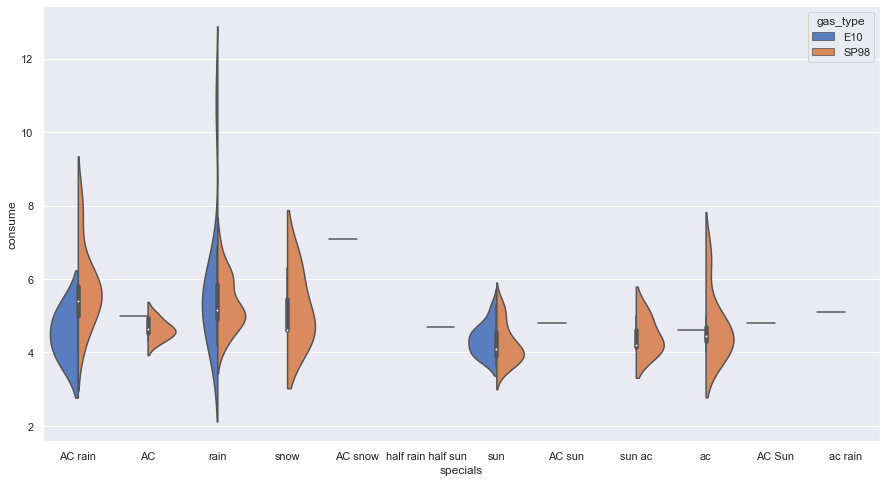

In [56]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.violinplot(x="specials", y="consume", hue="gas_type",
                    data=df_exl, palette="muted", split=True)

This plot shows that E10 engines with the AC and rain feature mostly have a lower fuel consumtion than SP98 engines. 

E10 cars with the sun feature have a little higher consumption than SP98 cars. 

The other feature combinations mostly only happen in SP98 cars, which shows that there is a higher variability in the choice of SP98 cars but doesn't allow for a comparison.

## Linear Regression Model:

In order to see the effect of distance, speed and gas_type on consumtion we build a linear model. 

In [58]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### One-Hot encoding gas type

In [77]:
df_exl['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [82]:
df_exl['gas_bool'] = pd.Series(np.where(df_exl['gas_type'] == 'SP98', 1, 0))

In [83]:
df_exl['gas_bool'].value_counts()

1    228
0    160
Name: gas_bool, dtype: int64

### Correlation

In [85]:
df_num = df_exl[['consume', 'distance', 'speed']]

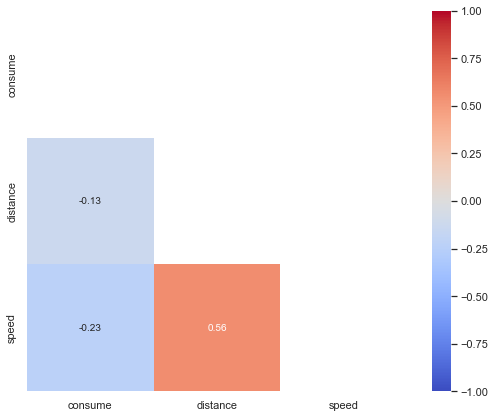

In [86]:
corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

The correlation is not very high, so there is no need to drop variables.

### Data Transformation

array([[<AxesSubplot:title={'center':'consume'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'speed'}>, <AxesSubplot:>]],
      dtype=object)

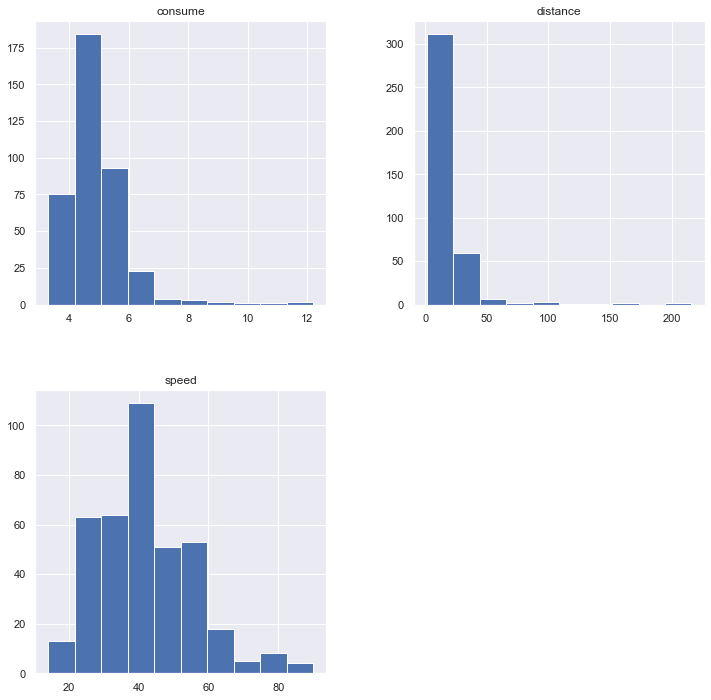

In [88]:
df_num.hist(figsize=(12,12))

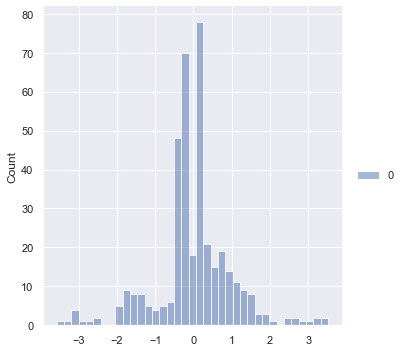

In [93]:
pt = PowerTransformer()
distance_transformed=pt.fit_transform(df_exl['distance'].to_numpy().reshape(-1,1))
sns.displot(distance_transformed)

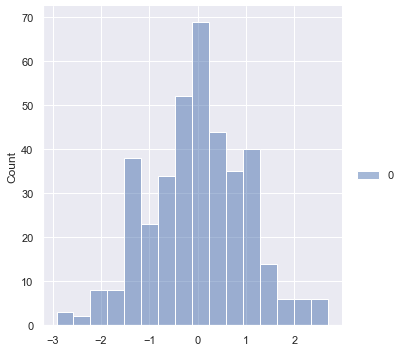

In [94]:
speed_transformed=pt.fit_transform(df_exl['speed'].to_numpy().reshape(-1,1))
sns.displot(speed_transformed)

In [98]:
df_exl["speed_transformed"]= speed_transformed
df_exl.drop(["speed"],axis=1,inplace=True)
df_exl["distance_transformed"]= distance_transformed
df_exl.drop(["distance"],axis=1,inplace=True)

In [103]:
df_exl.drop(['temp_inside', 'temp_outside', 'specials', 'AC', 'rain', 'sun', 'gas_type' ],axis=1,inplace=True)

KeyError: "['temp_inside', 'temp_inside', 'specials', 'AC', 'rain', 'sun'] not found in axis"

In [113]:
df_exl.drop(['temp_outside' ],axis=1,inplace=True)

In [114]:
df_exl

,consume,gas_bool,speed_transformed,distance_transformed
0,5.0,0,-1.287451,0.944500
1,4.2,0,-0.878283,-0.312475
2,5.5,0,-0.174969,-0.418416
3,3.9,0,-0.338874,-0.201878
4,4.5,0,0.418885,0.341152
...,...,...,...,...
383,3.7,1,-0.095577,0.124300
384,4.3,1,-0.174969,0.133660
385,3.8,1,0.349395,0.124300
386,4.6,1,0.133251,0.066786


In [115]:
X=df_exl.drop('consume', axis=1)
y=df_exl.consume

In [116]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [117]:
model=LinearRegression()    # model
model.fit(X_train, y_train)   # model train

LinearRegression()

In [118]:
model.coef_

array([-0.11378811, -0.13364449, -0.4662355 ])

In [119]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     28.95
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.07e-16
Time:                        15:50:30   Log-Likelihood:                -367.01
No. Observations:                 271   AIC:                             742.0
Df Residuals:                     267   BIC:                             756.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.9434 

The Linear Regression model shows, that the type of engine does not have an effect on fuel consumption.

## Conclusion

Even though the statistical tests are not conclusive, we recommend to Copify to buy more E10 engine cars. They seem to be lower in fuel consumption, higher in speed and higher in distance, while they are more eco friendly. 
However more data should be gathered to be able to have statistically relevant tests.

*go green, go E10 *